In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

In [2]:
param = {

# Parameters for the integration
"dt"         : 0.001,     # integration step size   
"ROI_num" : 1,       # number of neural nodes


# Parameters for the ODEs
# Excitatory population
"W_E" : 1.,              # scale of the external input
"tau_E" : 100.,          # decay time
"gamma_E" : 0.641/1000.,       # other dynamic parameter (?)

# Inhibitory population
"W_I" : 0.7,             # scale of the external input
"tau_I" : 10.,           # decay time
"gamma_I" : 1./1000.,          # other dynamic parameter (?)

# External input
"I_0" : 0.2,          # external input
"I_external" : 0.,       # external stimulation

# Coupling parameters
"g" : 20.,               # global coupling (from all nodes E_j to single node E_i)
"g_EE" : .5,            # local self excitatory feedback (from E_i to E_i)
"g_IE" : .14,            # local inhibitory coupling (from I_i to E_i)
"g_EI" : 0.15,            # local excitatory coupling (from E_i to I_i)
"lamb" : 0.,             # scale of global coupling on I_i (compared to E_i)

"aE":310,
"bE" :125,
"dE":0.16,
"aI":615,
"bI" :177, 
"dI" :0.087, 



} ### initial values of all model prameters

In [3]:
def h_tf(a, b, d, x):
    return (a*x-b)/(1.0000 -np.exp(-d*(a*x-b)))
def dh_tf(a,b,d, x):

        tmp_e=np.exp(-d*(a*x-b))
        tmp_d=1.-np.exp(-d*(a*x-b))
        slope_E=(a*tmp_d-(a*x-b)*d*a*tmp_e)/tmp_d**2
        return slope_E

def smooth_normalize(x):
    if x < 0.000001:
        x =0.000001
    return x

##### Wong-wang deco + Balloon BOLD
def derivative_orig(x): ### var is a vectior with 6 which is arragned by: E, I from Neural Model 
                                                                           ###    q, v, f, x from Balloon Model
    

    # Equations for the neural masses
    E = x.reshape((2,50))[0]
    I = x.reshape((2,50))[1]
    

    W_E = param["W_E"]
    tau_E = param["tau_E"]
    gamma_E = param["gamma_E"]

    W_I = param["W_I"]
    tau_I = param["tau_I"]
    gamma_I = param["gamma_I"]

    I_0 = param["I_0"]
    
    g_EE = param["g_EE"]
    g_IE = param["g_IE"]
    g_EI = param["g_EI"]
    aE = param["aE"]
    bE = param["bE"] 
    dE = param["dE"]
    aI = param["aI"]
    bI = param["bI"] 
    dI = param["dI"]

    IE = W_E*I_0 +g_EE*E -g_IE*I  #  input currents for E
    II = W_I*I_0 +g_EI*E -I  #  input currents for I 
    rE = h_tf(aE, bE, dE, IE) # firing rate for E
    rI = h_tf(aI, bI, dI, II) # firing rate for I 
    ddE = -E/tau_E +gamma_E*(1.-E)*rE  ### equlibrim point at E=(tau_E*gamma_E*rE)/(1+tau_E*gamma_E*rE)
    ddI = -I/tau_I +gamma_I*rI         ### equlibrim point at I=tau_I*gamma_I*rI


    #print(rE, rI)

    return np.array([ddE, ddI]).ravel()

##### Wong-wang deco + Balloon BOLD
def derivative(x): ### var is a vectior with 6 which is arragned by: E, I from Neural Model 
                                                                           ###    q, v, f, x from Balloon Model
    

    # Equations for the neural masses
    E = x[0]
    I = x[1]
    

    W_E = param["W_E"]
    tau_E = param["tau_E"]
    gamma_E = param["gamma_E"]

    W_I = param["W_I"]
    tau_I = param["tau_I"]
    gamma_I = param["gamma_I"]

    I_0 = param["I_0"]
    
    g_EE = param["g_EE"]
    g_IE = param["g_IE"]
    g_EI = param["g_EI"]
    aE = param["aE"]
    bE = param["bE"] 
    dE = param["dE"]
    aI = param["aI"]
    bI = param["bI"] 
    dI = param["dI"]

    IE = W_E*I_0 +g_EE*E -g_IE*I  #  input currents for E
    II = W_I*I_0 +g_EI*E -I  #  input currents for I 
    rE = h_tf(aE, bE, dE, IE) # firing rate for E
    rI = h_tf(aI, bI, dI, II) # firing rate for I 
    ddE = -E/tau_E +gamma_E*(1.-E)*rE  ### equlibrim point at E=(tau_E*gamma_E*rE)/(1+tau_E*gamma_E*rE)
    ddI = -I/tau_I +gamma_I*rI         ### equlibrim point at I=tau_I*gamma_I*rI


    #print(rE, rI)

    return 10000.0*np.array([ddE, ddI])

In [88]:
np.array([np.array([0.2, 0.5, 0.8]), np.array([0.1, 0.2,0.4])])

array([[0.2, 0.5, 0.8],
       [0.1, 0.2, 0.4]])

In [93]:
fsolve(derivative_orig, np.array([np.array([0.2, 0.5, 0.8]), np.array([0.1, 0.2,0.4])]).ravel())

array([0.02732312, 0.02732312, 0.02732312, 0.02254426, 0.02254426,
       0.02254426])

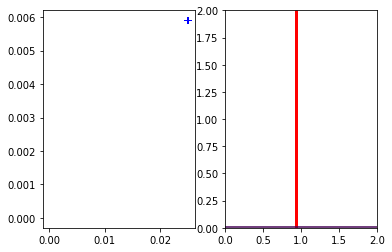

In [315]:
dt = 0.05*1e-04
iteration = 6100
last = 100

param["g_EE"] = 0.888888888
param["g_IE"] = 0.0
param["g_EI"] = 0.0
param["W_I"] = .7

param["I_0"] = 0.30

W_E = param["W_E"]
tau_E = param["tau_E"]
gamma_E = param["gamma_E"]

W_I = param["W_I"]
tau_I = param["tau_I"]
gamma_I = param["gamma_I"]

I_0 = param["I_0"]

g_EE = param["g_EE"]
g_IE = param["g_IE"]
g_EI = param["g_EI"]
aE = param["aE"]
bE = param["bE"] 
dE = param["dE"]
aI = param["aI"]
bI = param["bI"] 
dI = param["dI"]

x = np.array([0.01,.01])
xE = np.linspace(0,2)
xI = np.linspace(0,2)

E, I = np.meshgrid(xE, xI)

IE = W_E*I_0 +g_EE*E -g_IE*I #  input currents for E
II = W_I*I_0 +g_EI*E-I  #  input currents for I 
rE = h_tf(aE, bE, dE, IE) # firing rate for E
rI = h_tf(aI, bI, dI, II) # firing rate for I 





fig, ax = plt.subplots(1,2)

c1 = ax[1].contour(E,I, 1000*(-E/tau_E +gamma_E*(1.-E)*rE), [0], linewidths=3, colors ='r')
c2 = ax[1].contour(E,I, 1000*(-I/tau_I +gamma_I*rI),[0])




for i in range(iteration):
    x += dt *derivative(x)
    #x = np.tanh(x)
    ax[0].plot(0,0)
    if i > iteration - last:
        ax[0].plot(x[0], x[1], 'b+', alpha = 0.5)

        
plt.show()
        
    

In [4]:
def get_eig_sys(E, I, param):
    
    def h_tf(a, b, d, x):
        return (a*x-b)/(1.0000 -np.exp(-d*(a*x-b)))
        
    def dh_tf(a,b,d, x):

        tmp_e=np.exp(-d*(a*x-b))
        tmp_d=1.-np.exp(-d*(a*x-b))
        slope_E=(a*tmp_d-(a*x-b)*d*a*tmp_e)/tmp_d**2
        return slope_E
    
    W_E = param["W_E"]
    tau_E = param["tau_E"]
    gamma_E = param["gamma_E"]

    W_I = param["W_I"]
    tau_I = param["tau_I"]
    gamma_I = param["gamma_I"]

    I_0 = param["I_0"]
    
    g_EE = param["g_EE"]
    g_IE = param["g_IE"]
    g_EI = param["g_EI"]
    aE = param["aE"]
    bE = param["bE"] 
    dE = param["dE"]
    aI = param["aI"]
    bI = param["bI"] 
    dI = param["dI"]

    IE = W_E*I_0 +g_EE*E -g_IE*I  #  input currents for E
    II = W_I*I_0 +g_EI*E -I  #  input currents for I 
    rE = h_tf(aE, bE, dE, IE) # firing rate for E
    rI = h_tf(aI, bI, dI, II)
    drEdIE = dh_tf(aE, bE, dE, IE)
    drIIdII = dh_tf(aI, bI, dI, II)
    
    A = np.zeros((2,2))
    A[0,0] = -1/tau_E - gamma_E*h_tf(aE, bE, dE, IE) +(1- E)*gamma_E* drEdIE *g_EE
    A[0,1] = -(1-E)*gamma_E* drEdIE *g_IE
    A[1,0] = gamma_I*drIIdII*g_EI
    A[1, 1] = - gamma_I*drIIdII
    A =np.nan_to_num(A)
    
    
    d, U = np.linalg.eig(A)
    return d
    

In [48]:
d, U = np.linalg.eig(np.array([[1,0.3], [0.4,2]]))

In [49]:
d

array([0.89172375, 2.10827625])

In [5]:
### 
param_study = ['g_EE', 'g_IE', 'g_EI']#, 'I_0']
num_param = 3
num_trials = 50
gEE_rng = np.linspace(0.,2, num_trials)
gIE_rng = np.linspace(0.0,2, num_trials)
gEI_rng = np.linspace(0.0,2, num_trials)
#I0_rng = np.linspace(0.1,1, 10)

/opt/Python-3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/Python-3.5.2/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/Python-3.5.2/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


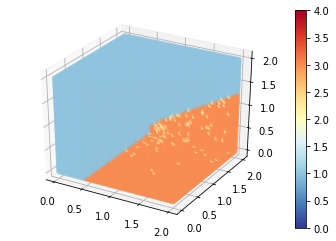

In [6]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

gEE, gIE, gEI = np.meshgrid(gEE_rng, gIE_rng, gEI_rng)#, I0_rng)
#gIE, gEI = np.meshgrid(gIE_rng, gEI_rng)#, I0_rng)
gEE_good =[]
gIE_good =[]
gEI_good =[]
I0_good =[]
c =[]

for i in range(num_trials**num_param):
    ind_0 = i//num_trials**(num_param -1)
    ind_1 = (i%num_trials**(num_param -1)) //num_trials**(num_param -2)
    ind_2 = ((i%num_trials**(num_param -1)) % num_trials**(num_param -2)) // num_trials**(num_param -3)
    #ind_3 = ((i%num_trials**(num_param -1)) % num_trials**(num_param -2)) % num_trials**(num_param -3)
    param['g_EE'] = gEE[ind_0][ind_1][ind_2]#[ind_3]
    param['g_IE'] = gIE[ind_0][ind_1][ind_2]#[ind_3]
    param['g_EI'] = gEI[ind_0][ind_1][ind_2]#[ind_3]
    #param['I_0'] = I0[ind_0][ind_1][ind_2][ind_3]
    #param['g_EE'] = gEE[ind_0][ind_1][ind_2]#[ind_3]
    """param['g_IE'] = gIE[ind_0][ind_1]#[ind_2]#[ind_3]
    param['g_EI'] = gEI[ind_0][ind_1]#[ind_2]#[ind_3]"""
    
    gEE_good.append(param['g_EE'])
    gIE_good.append(param['g_IE'])
    gEI_good.append(param['g_EI'])
    
    #print(param['g_EE'], param['g_IE'], param['g_EI'], param['I_0'])
    initial = np.random.uniform(0.,2, [2, 100])
    solns = []
    for i in range(100):
        x0 = initial[:,i]
        #print('x0', x0)
        for j in range(20):
            x0 = np.round(fsolve(derivative, x0), decimals =4)
        
        #print('solutions', solutions)
        #print(derivative(solutions))
        if (np.abs(derivative(x0)) > 1.0).sum() == 0:
            solns.append(tuple(x0))
    #print(len(set(solns)))
    good_sols =[]
    for sol in set(solns):
        sol_good = True
        if len(good_sols)>0:
            for g_sol in good_sols:
                if np.sqrt(((np.array(g_sol)-np.array(sol))**2).mean()) < 1e-3:
                    sol_good = False
                    break
        if sol_good == True:
            good_sols.append(sol)
            
    #print(len(good_sols))
    c.append(len(good_sols))
    """for sol in good_sols:
        #print(sol, derivative(np.array(sol)))
        eig = get_eig_sys(sol[0], sol[1], param)
        print(sol[0], sol[1], 'eig=', eig)"""

im = ax.scatter(np.array(gEE_good), np.array(gIE_good), np.array(gEI_good), cmap ='RdYlBu_r', c = np.array(c), vmax=4, vmin=0) 
fig.colorbar(im, ax = ax)
plt.show()

In [ ]:
outdir= '/brunhild/mcintosh_lab/jwang/ModelFitting/'
np.save(outdir + 'wongwangdeco_bi', np.array(gEE_good))

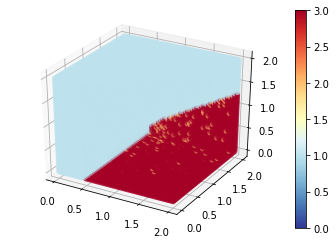

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
im = ax.scatter(np.array(gEE_good), np.array(gIE_good), np.array(gEI_good), cmap ='RdYlBu_r', c = np.array(c), vmin=0) 
fig.colorbar(im, ax = ax)
plt.show()

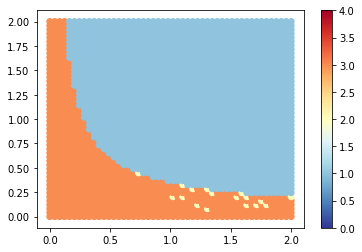

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.scatter(np.array(gIE_good), np.array(gEI_good), cmap ='RdYlBu_r', c = np.array(c), vmax =4, vmin=0) 
fig.colorbar(im, ax = ax)
plt.show()